In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



forest = pd.read_csv('./csv/forest.csv', sep = ',')
forest_area = pd.read_csv('./csv/forest_area.csv', sep = ',')
brazil_loss = pd.read_csv('./csv/brazil_loss.csv', sep = ',')
soybean_use = pd.read_csv('./csv/soybean_use.csv', sep = ',')
vegetable_oil = pd.read_csv('./csv/vegetable_oil.csv', sep = ',')

pd.set_option("max_rows", 200)
def tamanhoPlot():
    fig_dims = (15, 10)
    fig, ax = plt.subplots(figsize=fig_dims)
    return ax


# Quanto desmatamento acontece ?

<AxesSubplot:xlabel='Ano', ylabel='Conversão_líquida_de_floresta'>

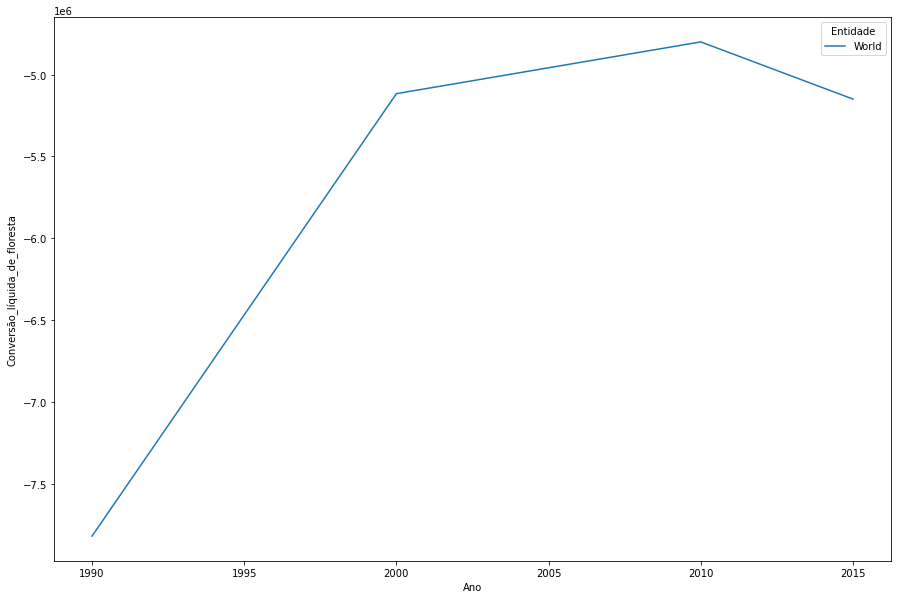

In [38]:
data_f = forest[(forest.Código.notna()) & (forest['Entidade'] == 'World')]
data_f = data_f.sort_values(['Conversão_líquida_de_floresta'])
forest.sort_values(['Conversão_líquida_de_floresta'], inplace=True)
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Ano', y = 'Conversão_líquida_de_floresta', data=data_f, hue='Entidade', ax=ax)



## Desmatamento ao redor do mundo foi o menor em 2010
## depois voltou a crescer

# Quais países estão perdendo floresta ?

<AxesSubplot:xlabel='Ano', ylabel='Conversão_líquida_de_floresta'>

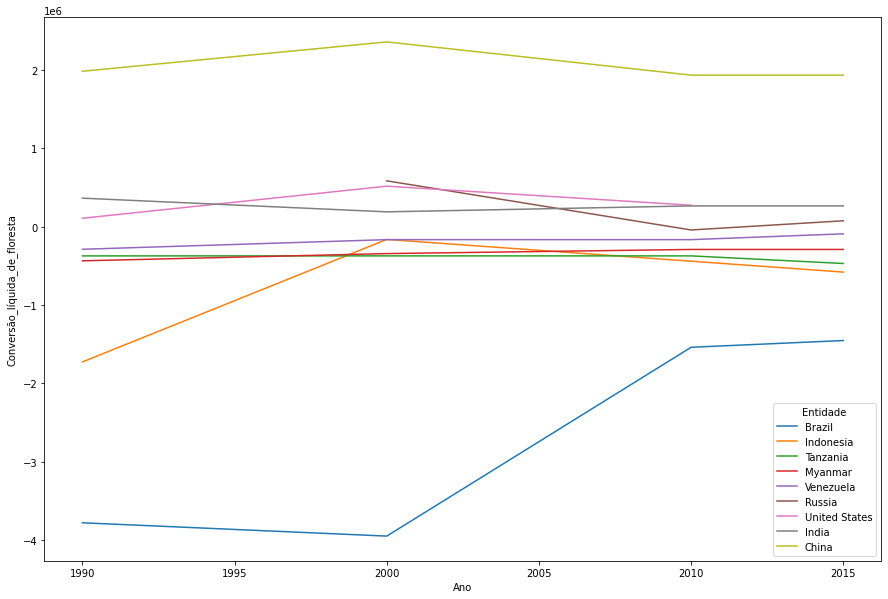

In [39]:
data_f = forest[(forest.Código.notna()) &((forest['Entidade'] == 'Brazil')#Seleção de alguns países
                                        | (forest['Entidade'] == 'Indonesia') 
                                        | (forest['Entidade'] == 'Tanzania')
                                        |(forest['Entidade'] == 'Myanmar')
                                        |(forest['Entidade'] == 'Venezuela')
                                        |(forest['Entidade'] == 'India')
                                        |(forest['Entidade'] == 'China')
                                        |(forest['Entidade'] == 'Russia')
                                        |(forest['Código'] == 'USA'))]
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Ano', y = 'Conversão_líquida_de_floresta', data=data_f, hue='Entidade', ax=ax)


# O país que mais desmata é o Brasil

## Agora vamos olhar a Área de floresta desses países


<AxesSubplot:xlabel='Ano', ylabel='Área_de_Floresta'>

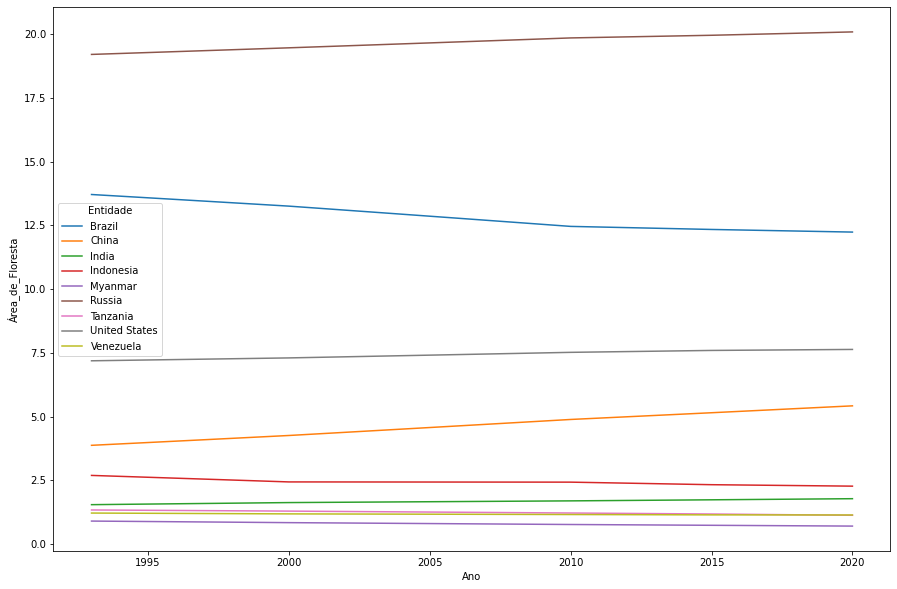

In [40]:
data_fa = forest_area[(forest_area.Código.notna()) & (forest_area.Ano > 1992) 
                                        &((forest_area['Entidade'] == 'Brazil')#Seleção de alguns países
                                        |(forest_area['Entidade'] == 'Indonesia') 
                                        |(forest_area['Entidade'] == 'Tanzania')
                                        |(forest_area['Entidade'] == 'Myanmar')
                                        |(forest_area['Entidade'] == 'Venezuela')
                                        |(forest_area['Entidade'] == 'India')
                                        |(forest_area['Entidade'] == 'China')
                                        |(forest_area['Entidade'] == 'Russia')
                                        |(forest_area['Código'] == 'USA'))]
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Ano', y = 'Área_de_Floresta', data=data_fa, hue='Entidade', ax=ax)

# Porque o Brasil ? Como ? O que ? 

<AxesSubplot:xlabel='Ano', ylabel='Danos'>

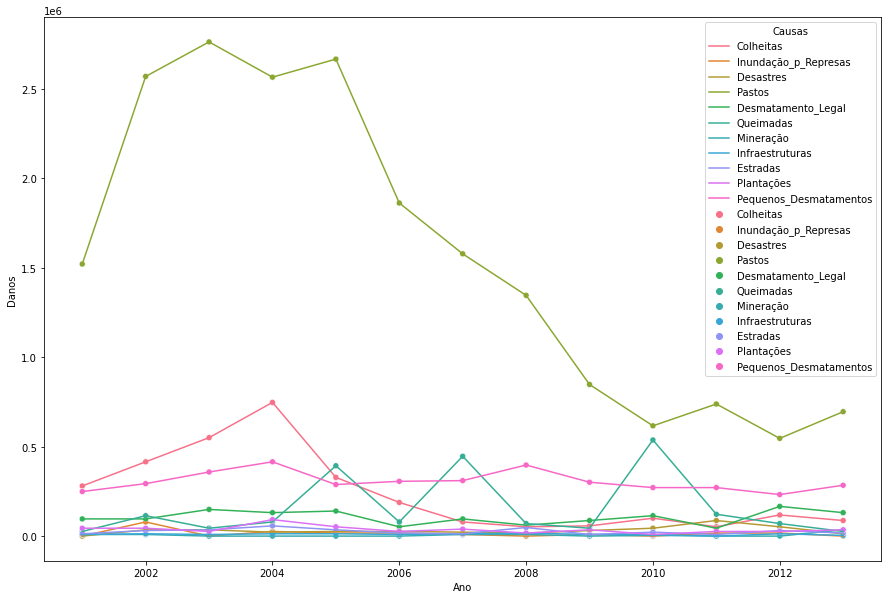

In [41]:
df1 = brazil_loss.select_dtypes([int, float])
ls = pd.melt(df1,id_vars=['Ano'],value_vars=df1.columns,var_name='Causas', value_name='Danos')
ls.sort_values(by='Danos', ascending=False)
ax=tamanhoPlot()
sns.lineplot(x='Ano', y='Danos', data=ls, hue='Causas', ax=ax)
sns.scatterplot(x='Ano', y='Danos', data=ls, hue='Causas', ax=ax)


### Os pastos são os principais causadores do desmatamento no Brasil

<AxesSubplot:xlabel='Ano', ylabel='Produção_Óleo'>

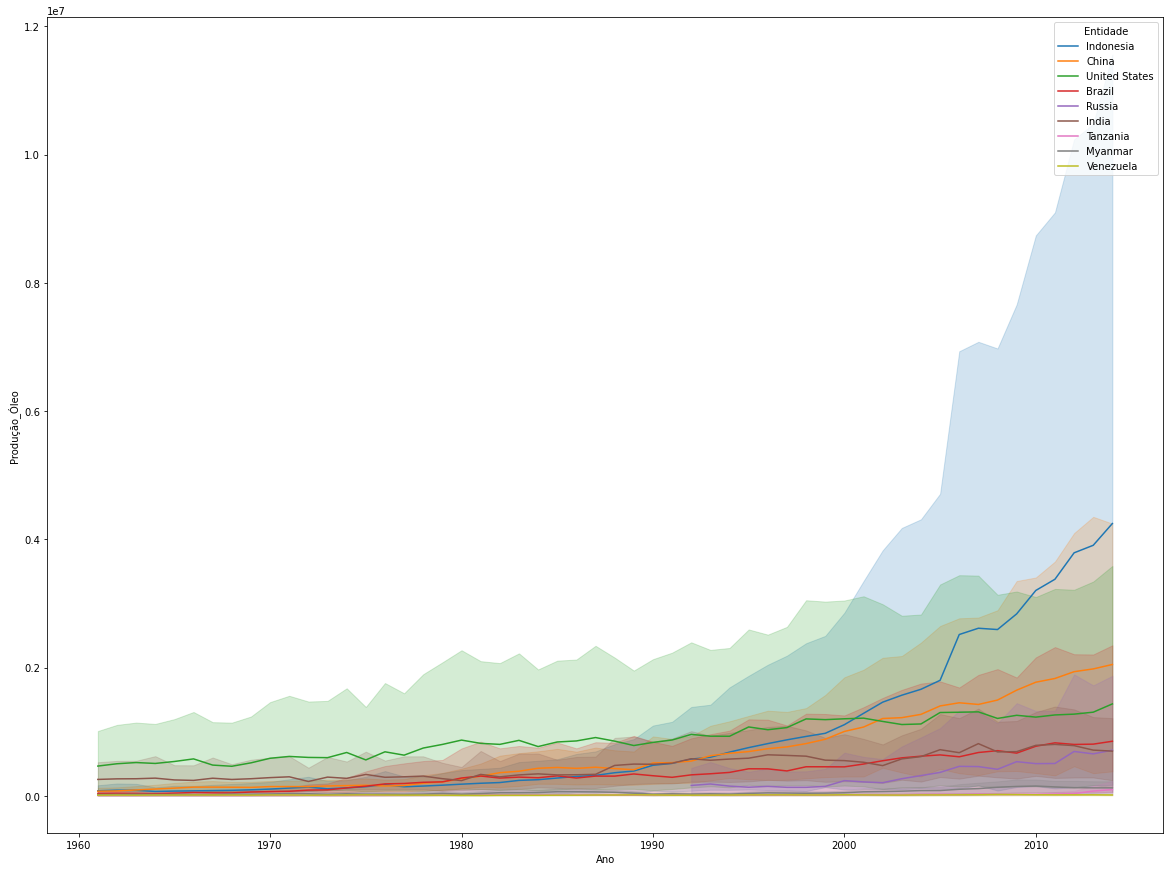

In [42]:
data_v = vegetable_oil[(vegetable_oil.Código.notna()) & ((vegetable_oil['Entidade'] == 'Brazil')#Seleção de alguns países
                                        |(vegetable_oil['Entidade'] == 'Indonesia') 
                                        |(vegetable_oil['Entidade'] == 'Tanzania')
                                        |(vegetable_oil['Entidade'] == 'Myanmar')
                                        |(vegetable_oil['Entidade'] == 'Venezuela')
                                        |(vegetable_oil['Entidade'] == 'India')
                                        |(vegetable_oil['Entidade'] == 'China')
                                        |(vegetable_oil['Entidade'] == 'Russia')
                                        |(vegetable_oil['Código'] == 'USA'))]
data_v = data_v.sort_values(['Produção_Óleo'],ascending=False)
data_v.dropna()
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Ano',  y='Produção_Óleo', data=data_v, hue='Entidade', ax=ax)

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Ano', ylabel='Toneladas'>

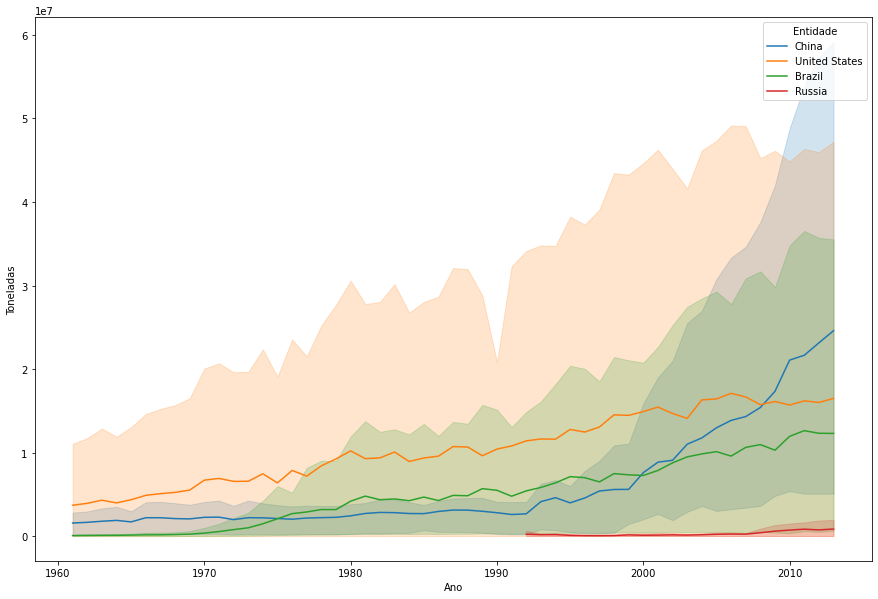

In [43]:
data_sb = soybean_use[(soybean_use.Código.notna()) & ((soybean_use['Entidade'] == 'Brazil')#Seleção de alguns países
                                        |(soybean_use['Entidade'] == 'Indonesia') 
                                        |(soybean_use['Entidade'] == 'Tanzania')
                                        |(soybean_use['Entidade'] == 'Myanmar')
                                        |(soybean_use['Entidade'] == 'Venezuela')
                                        |(soybean_use['Entidade'] == 'India')
                                        |(soybean_use['Entidade'] == 'China')
                                        |(soybean_use['Entidade'] == 'Russia')
                                        |(soybean_use['Código'] == 'USA'))]
data_sb.dropna(inplace=True)
data_sb.sort_values(['Processados'], ascending=False, inplace=True)

ls = pd.melt(data_sb, id_vars=['Ano', 'Código','Entidade'], value_vars=data_sb.columns,var_name='Produção', value_name='Toneladas')
ax = tamanhoPlot()
sns.lineplot(x='Ano', y='Toneladas', data=ls, hue='Entidade', ax=ax)
